In [1]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D
from keras.datasets import imdb

import numpy
import tensorflow as tf
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=5000)

17465344/17464789 [==============================] - 4s 0us/step


In [4]:
x_train = sequence.pad_sequences(x_train, maxlen=100)
x_test = sequence.pad_sequences(x_test, maxlen=100)

In [5]:
model = Sequential()
model.add(Embedding(5000,100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu',strides=1))
model.add((MaxPooling1D(pool_size=4)))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 100)         500000    
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 100)         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 64)          32064     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, None, 64)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 55)                26400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 56        
_________________________________________________________________
activation_1 (Activation)    (None, 1)                

In [6]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [7]:
history = model.fit(x_train, y_train, batch_size=100, epochs=5,
                   validation_data=(x_test, y_test))

C:\Users\pc\Anaconda3\envs\tf2.0-gpu\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 8s 317us/step - loss: 0.4510 - accuracy: 0.7671 - val_loss: 0.3348 - val_accuracy: 0.8515
Epoch 2/5
25000/25000 [==============================] - 6s 233us/step - loss: 0.2878 - accuracy: 0.8787 - val_loss: 0.3268 - val_accuracy: 0.8586
Epoch 3/5
25000/25000 [==============================] - 6s 231us/step - loss: 0.2472 - accuracy: 0.9007 - val_loss: 0.3332 - val_accuracy: 0.8574
Epoch 4/5
25000/25000 [==============================] - 6s 233us/step - loss: 0.2087 - accuracy: 0.9183 - val_loss: 0.3469 - val_accuracy: 0.8543
Epoch 5/5
25000/25000 [==============================] - 6s 233us/step - loss: 0.1785 - accuracy: 0.9312 - val_loss: 0.3563 - val_accuracy: 0.8525


In [8]:
print('\n Test Accuracy: %.4f' % (model.evaluate(x_test, y_test)[1]))

25000/25000 [==============================] - 4s 149us/step

 Test Accuracy: 0.8525


In [9]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

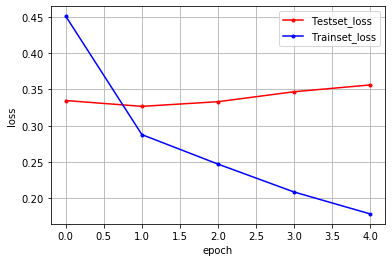

In [11]:
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.',c='red',label='Testset_loss')
plt.plot(x_len, y_loss, marker='.',c='blue',label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()